In [93]:
from rdkit import Chem
from rdkit import RDLogger
import line_profiler

RDLogger.DisableLog("rdApp.*")

In [94]:
def reader1():
    mols = Chem.SDMolSupplier("./ADRB1/docking/ADRB1_decoy_docking_lib.sdf")
    res = [m for m in mols]
    return res


def reader2():
    mols = Chem.MultithreadedSDMolSupplier(
        "./ADRB1/docking/ADRB1_decoy_docking_lib.sdf", numWriterThreads=8
    )
    res = [m for m in mols]
    return res

In [95]:
pr = line_profiler.LineProfiler()
pr.add_function(reader1)
pr.add_function(reader2)

In [96]:
pr.enable()

In [97]:
res1 = reader1()
res2 = reader2()

In [98]:
pr.print_stats()

Timer unit: 1e-09 s

Total time: 1.8948 s
File: /var/folders/2c/b9b_8fbs13j5zcz4wv9bqqjm0000gn/T/ipykernel_9447/3530068172.py
Function: reader1 at line 1

Line #      Hits         Time  Per Hit   % Time  Line Contents
     1                                           def reader1():
     2         1     295000.0 295000.0      0.0      mols = Chem.SDMolSupplier("./ADRB1/docking/ADRB1_decoy_docking_lib.sdf")
     3         1 1894505000.0    2e+09    100.0      res = [m for m in mols]
     4         1          0.0      0.0      0.0      return res

Total time: 0.782535 s
File: /var/folders/2c/b9b_8fbs13j5zcz4wv9bqqjm0000gn/T/ipykernel_9447/3530068172.py
Function: reader2 at line 7

Line #      Hits         Time  Per Hit   % Time  Line Contents
     7                                           def reader2():
     8         2     177000.0  88500.0      0.0      mols = Chem.MultithreadedSDMolSupplier(
     9         1       1000.0   1000.0      0.0          "./ADRB1/docking/ADRB1_decoy_docking_

In [99]:
import pandas as pd

In [100]:
def load_sdf_to_dataframe(args):
    """
    Load molecules and their properties from an SDF file into a DataFrame.
    """
    file, active_status = args  # Unpack the tuple of arguments

    # Create a molecule supplier
    mol_supplier = Chem.SDMolSupplier(file)

    # Load the molecules and their properties into a list
    molecules = []
    for mol in mol_supplier:
        if mol is not None:
            props = mol.GetPropsAsDict()
            props["Title"] = mol.GetProp("_Name")
            props["Mol"] = mol
            props["Activity"] = 1 if active_status == "active" else 0
            molecules.append(props)

    # Convert the list into a DataFrame
    df = pd.DataFrame(molecules)

    # Reorder the DataFrame columns
    cols = ["Title", "Mol", "Activity"] + [
        col for col in df.columns if col not in ["Title", "Mol", "Activity"]
    ]
    df = df[cols]

    return df

In [101]:
active_df=load_sdf_to_dataframe(("./ADRB1/docking/ADRB1_active_docking_lib.sdf", "active"))

In [102]:
active_df

,Title,Mol,Activity,s_m_source_file,i_m_source_file_index,i_lp_mmshare_version,i_f3d_flags,s_lp_Force_Field,r_lp_Energy,b_lp_Chiralities_Consistent,...,r_i_glide_evdw,r_i_glide_ecoul,r_i_glide_erotb,r_i_glide_esite,r_i_glide_emodel,r_i_glide_energy,r_i_glide_einternal,i_i_glide_confnum,i_i_glide_posenum,r_i_glide_eff_state_penalty
0,bucindolol_Isomer1,<rdkit.Chem.rdchem.Mol object at 0x297545850>,1,ADRB1_chembl19_set_active_sc.smi,2,53161,0,S-OPLS,34.8462,1,...,-40.1405,-22.07520,1.01313,-0.091606,-110.2750,-62.2158,6.38696,111,71,0
1,bucindolol_Isomer1,<rdkit.Chem.rdchem.Mol object at 0x297545540>,1,ADRB1_chembl19_set_active_sc.smi,288,53161,0,S-OPLS,34.8462,1,...,-40.1405,-22.07520,1.01313,-0.091606,-110.2750,-62.2158,6.38696,111,71,0
2,carmoterol_Isomer4,<rdkit.Chem.rdchem.Mol object at 0x2975458c0>,1,ADRB1_chembl19_set_active_sc.smi,7,53161,0,S-OPLS,41.8524,1,...,-43.1217,-13.79800,0.59334,-0.077964,-103.9220,-56.9198,3.71715,17,1,0
3,carmoterol_Isomer4,<rdkit.Chem.rdchem.Mol object at 0x2af3f3d10>,1,ADRB1_chembl19_set_active_sc.smi,293,53161,0,S-OPLS,41.8524,1,...,-43.1217,-13.79800,0.59334,-0.077964,-103.9220,-56.9198,3.71715,17,1,0
4,carmoterol_Isomer1,<rdkit.Chem.rdchem.Mol object at 0x297545700>,1,ADRB1_chembl19_set_active_sc.smi,4,53161,0,S-OPLS,42.5851,1,...,-36.8597,-20.10340,0.59334,-0.100000,-94.4378,-56.9631,14.75390,125,271,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,CHEMBL40272_Isomer2,<rdkit.Chem.rdchem.Mol object at 0x28b0e6e30>,1,ADRB1_chembl19_set_active_sc.smi,86,53161,0,S-OPLS,40.4957,1,...,-32.3469,-7.13521,3.31882,-0.011730,-45.2288,-39.4821,6.90367,82,288,0
298,CHEMBL40217_Isomer2,<rdkit.Chem.rdchem.Mol object at 0x28b0e6ea0>,1,ADRB1_chembl19_set_active_sc.smi,180,53161,0,S-OPLS,37.9632,1,...,-32.1851,-6.01978,3.49987,-0.100000,-45.0606,-38.2049,4.79942,37,189,0
299,CHEMBL43111_Isomer2,<rdkit.Chem.rdchem.Mol object at 0x28b0e6f10>,1,ADRB1_chembl19_set_active_sc.smi,93,53161,0,S-OPLS,39.7190,1,...,-30.7147,-7.49605,3.31882,-0.071161,-44.8005,-38.2108,3.48724,37,343,0
300,CHEMBL40217_Isomer1,<rdkit.Chem.rdchem.Mol object at 0x28b0e6f80>,1,ADRB1_chembl19_set_active_sc.smi,179,53161,0,S-OPLS,37.8565,1,...,-33.8361,-3.24731,3.49987,-0.062850,-41.4319,-37.0834,6.12447,30,302,0


In [103]:
def load_sdf_to_dataframe_multithread(args):
    """
    Load molecules and their properties from an SDF file into a DataFrame.
    """
    file, active_status = args  # Unpack the tuple of arguments

    # Create a molecule supplier
    mol_supplier = Chem.MultithreadedSDMolSupplier(file, numWriterThreads=8
    )

    # Load the molecules and their properties into a list
    molecules = []
    for mol in mol_supplier:
        if mol is not None:
            props = mol.GetPropsAsDict()
            props["Title"] = mol.GetProp("_Name")
            props["Mol"] = mol
            props["Activity"] = 1 if active_status == "active" else 0
            molecules.append(props)

    # Convert the list into a DataFrame
    df = pd.DataFrame(molecules)

    # Reorder the DataFrame columns
    cols = ["Title", "Mol", "Activity"] + [
        col for col in df.columns if col not in ["Title", "Mol", "Activity"]
    ]
    df = df[cols]

    return df

In [104]:
active_df=load_sdf_to_dataframe_multithread(("./ADRB1/docking/ADRB1_active_docking_lib.sdf", "active"))

In [105]:
def load_sdf_to_dataframe_multithread_dict(args):
  """
  Load molecules and their properties from an SDF file into a DataFrame.
  """
  file, active_status = args  # Unpack the tuple of arguments

  # Create a molecule supplier
  mol_supplier = Chem.MultithreadedSDMolSupplier(file, numWriterThreads=8)

  # Load the molecules and their properties into a list
  molecules = []
  first_mol = True
  for mol in mol_supplier:
    if mol is not None:
      if first_mol:
        # Get properties as dictionary only for the first molecule
        props = mol.GetPropsAsDict()
        keys = props.keys()
        first_mol = False
      else:
        # For the rest of the molecules, get properties directly
        props = {key: mol.GetProp(key) for key in keys if mol.HasProp(key)}
      
      props["Title"] = mol.GetProp("_Name")
      props["Mol"] = mol
      props["Activity"] = 1 if active_status == "active" else 0
      molecules.append(props)

  # Convert the list into a DataFrame
  df = pd.DataFrame(molecules)

  # Reorder the DataFrame columns
  cols = ["Title", "Mol", "Activity"] + [
    col for col in df.columns if col not in ["Title", "Mol", "Activity"]
  ]
  df = df[cols]
  df = df.rename(columns={"Title": "Molecule_Name"})

  return df

In [106]:
active_df=load_sdf_to_dataframe_multithread_dict(("./ADRB1/docking/ADRB1_active_docking_lib.sdf", "active"))

In [107]:
active_df

,Molecule_Name,Mol,Activity,s_m_source_file,i_m_source_file_index,i_lp_mmshare_version,i_f3d_flags,s_lp_Force_Field,r_lp_Energy,b_lp_Chiralities_Consistent,...,r_i_glide_evdw,r_i_glide_ecoul,r_i_glide_erotb,r_i_glide_esite,r_i_glide_emodel,r_i_glide_energy,r_i_glide_einternal,i_i_glide_confnum,i_i_glide_posenum,r_i_glide_eff_state_penalty
0,carmoterol_Isomer4,<rdkit.Chem.rdchem.Mol object at 0x2df4d4ba0>,1,ADRB1_chembl19_set_active_sc.smi,7,53161,0,S-OPLS,41.8524,1,...,-43.1217,-13.798,0.59334,-0.077964,-103.922,-56.9198,3.71715,17,1,0
1,bucindolol_Isomer1,<rdkit.Chem.rdchem.Mol object at 0x28b153990>,1,ADRB1_chembl19_set_active_sc.smi,2,53161,0,S-OPLS,34.8462,1,...,-40.1405,-22.0752,1.01313,-0.0916056,-110.275,-62.2158,6.38696,111,71,0
2,bucindolol_Isomer1,<rdkit.Chem.rdchem.Mol object at 0x28b153a00>,1,ADRB1_chembl19_set_active_sc.smi,288,53161,0,S-OPLS,34.8462,1,...,-40.1405,-22.0752,1.01313,-0.0916056,-110.275,-62.2158,6.38696,111,71,0
3,carmoterol_Isomer4,<rdkit.Chem.rdchem.Mol object at 0x28b153920>,1,ADRB1_chembl19_set_active_sc.smi,293,53161,0,S-OPLS,41.8524,1,...,-43.1217,-13.798,0.59334,-0.0779635,-103.922,-56.9198,3.71715,17,1,0
4,carmoterol_Isomer2,<rdkit.Chem.rdchem.Mol object at 0x28b153a70>,1,ADRB1_chembl19_set_active_sc.smi,291,53161,0,S-OPLS,42.2414,1,...,-43.0092,-16.0992,0.59334,-0.0816296,-102.652,-59.1085,6.655,40,302,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,CHEMBL40272_Isomer2,<rdkit.Chem.rdchem.Mol object at 0x28b113d80>,1,ADRB1_chembl19_set_active_sc.smi,86,53161,0,S-OPLS,40.4957,1,...,-32.3469,-7.13521,3.31882,-0.0117303,-45.2288,-39.4821,6.90367,82,288,0
298,CHEMBL40217_Isomer2,<rdkit.Chem.rdchem.Mol object at 0x28b113df0>,1,ADRB1_chembl19_set_active_sc.smi,180,53161,0,S-OPLS,37.9632,1,...,-32.1851,-6.01978,3.49987,-0.1,-45.0606,-38.2049,4.79942,37,189,0
299,CHEMBL43111_Isomer2,<rdkit.Chem.rdchem.Mol object at 0x28b113e60>,1,ADRB1_chembl19_set_active_sc.smi,93,53161,0,S-OPLS,39.719,1,...,-30.7147,-7.49605,3.31882,-0.0711614,-44.8005,-38.2108,3.48724,37,343,0
300,CHEMBL40217_Isomer1,<rdkit.Chem.rdchem.Mol object at 0x28b113ed0>,1,ADRB1_chembl19_set_active_sc.smi,179,53161,0,S-OPLS,37.8565,1,...,-33.8361,-3.24731,3.49987,-0.0628495,-41.4319,-37.0834,6.12447,30,302,0


In [108]:
decoy_df = load_sdf_to_dataframe_multithread_dict(
    ("./ADRB1/docking/ADRB1_decoy_docking_lib.sdf", "decoy")
)

In [109]:
decoy_df

,Molecule_Name,Mol,Activity,s_m_source_file,i_m_source_file_index,i_lp_mmshare_version,i_f3d_flags,s_lp_Force_Field,r_lp_Energy,b_lp_Chiralities_Consistent,...,r_i_glide_evdw,r_i_glide_ecoul,r_i_glide_erotb,r_i_glide_esite,r_i_glide_emodel,r_i_glide_energy,r_i_glide_einternal,i_i_glide_confnum,i_i_glide_posenum,r_i_glide_eff_state_penalty
0,C63708486_Isomer1,<rdkit.Chem.rdchem.Mol object at 0x2ccad5310>,0,ADRB1_chembl19_set_decoy_sc.smi,8569,53161,0,S-OPLS,49.8446,1,...,-54.4511,-19.0713,0.737216,-0.116696,-127.26,-73.5224,5.13553,131,115,0
1,C63708483_Isomer1,<rdkit.Chem.rdchem.Mol object at 0x28b153760>,0,ADRB1_chembl19_set_decoy_sc.smi,5833,53161,0,S-OPLS,54.0193,1,...,-56.0264,-17.6283,0.737216,-0.0995119,-124.272,-73.6547,5.28155,299,162,0
2,C15446699_Isomer2,<rdkit.Chem.rdchem.Mol object at 0x28b153610>,0,ADRB1_chembl19_set_decoy_sc.smi,1244,53161,0,S-OPLS,57.847,1,...,-54.958,-12.1792,0.653844,-0.130999,-115.198,-67.1372,9.29601,26,148,0
3,C20168010_Isomer1,<rdkit.Chem.rdchem.Mol object at 0x28b1535a0>,0,ADRB1_chembl19_set_decoy_sc.smi,6370,53161,0,S-OPLS,47.3955,1,...,-55.4296,-16.1753,0.741446,-0.00264788,-115.786,-71.6048,7.0869,108,174,0
4,C39388151_Isomer1,<rdkit.Chem.rdchem.Mol object at 0x28b153530>,0,ADRB1_chembl19_set_decoy_sc.smi,10214,53161,0,S-OPLS,53.5699,1,...,-56.7347,-11.7744,0.697228,-0.229558,-111.201,-68.5092,7.73159,8,22,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11660,C49229239_Isomer1,<rdkit.Chem.rdchem.Mol object at 0x376dad540>,0,ADRB1_chembl19_set_decoy_sc.smi,5038,53161,0,S-OPLS,25.6059,1,...,-30.6279,-4.77582,4.00928,-0.0884848,-35.4171,-35.4037,6.44646,33,252,0
11661,C73803375_Isomer1,<rdkit.Chem.rdchem.Mol object at 0x376dad5b0>,0,ADRB1_chembl19_set_decoy_sc.smi,11344,53161,0,S-OPLS,29.9424,1,...,-26.6027,-0.649064,2.93586,-0.034253,-30.839,-27.2518,1.22089,4,189,0
11662,C70538242_Isomer1,<rdkit.Chem.rdchem.Mol object at 0x376dad620>,0,ADRB1_chembl19_set_decoy_sc.smi,9113,53161,0,S-OPLS,9.53065,1,...,-27.7964,-6.89188,4.43201,-0.0956744,-37.3521,-34.6882,1.83846,185,237,0
11663,C74546931_Isomer1,<rdkit.Chem.rdchem.Mol object at 0x376dad690>,0,ADRB1_chembl19_set_decoy_sc.smi,9118,53161,0,S-OPLS,26.0528,1,...,-19.1135,-8.18618,4.08318,0,-27.7906,-27.2997,1.32567,5,207,0


In [110]:
# from old code, probably fine but not optimal 

def concatenate_csv_files(file_list):
    """
    Concatenates multiple strain CSV files into a single dataframe.
    Only the first five columns are kept for now.

    Args:
        file_list (list): A list of file paths to the CSV files.

    Returns:
        pandas.DataFrame: The concatenated dataframe.

    """
    # Specify the column names
    column_names = [
        "Molecule_Name",
        "Total_E",
        "Lower_Bound",
        "Upper_Bound",
        "Num_Torsion_Patterns",
    ]

    # List to hold dataframes
    df_list = []

    # Loop over each file in the list
    for file in file_list:
        # Import the CSV file as a df, using only the first five columns of the CSV file
        df = pd.read_csv(file, usecols=range(5), names=column_names, header=0)
        df_list.append(df)

    # Concatenate all dataframes in the list
    final_df = pd.concat(df_list, ignore_index=True)

    return final_df

In [111]:
active_sdf_df = load_sdf_to_dataframe_multithread_dict(
  ("./ADRB1/docking/ADRB1_active_docking_lib.sdf", "active"))

active_strain_df = concatenate_csv_files(["./ADRB1/strain/ADRB1_active_docking_lib.csv"])


decoy_sdf_df = load_sdf_to_dataframe_multithread_dict(
  ("./ADRB1/docking/ADRB1_decoy_docking_lib.sdf", "inactive")
)

decoy_strain_df = concatenate_csv_files(["./ADRB1/strain/ADRB1_decoy_docking_lib.csv"])



In [112]:
display(active_sdf_df.head())
display(active_strain_df.head())
display(decoy_sdf_df.head())
display(decoy_strain_df.head())


,Molecule_Name,Mol,Activity,s_m_source_file,i_m_source_file_index,i_lp_mmshare_version,i_f3d_flags,s_lp_Force_Field,r_lp_Energy,b_lp_Chiralities_Consistent,...,r_i_glide_evdw,r_i_glide_ecoul,r_i_glide_erotb,r_i_glide_esite,r_i_glide_emodel,r_i_glide_energy,r_i_glide_einternal,i_i_glide_confnum,i_i_glide_posenum,r_i_glide_eff_state_penalty
0,bucindolol_Isomer1,<rdkit.Chem.rdchem.Mol object at 0x34416c580>,1,ADRB1_chembl19_set_active_sc.smi,2,53161,0,S-OPLS,34.8462,1,...,-40.1405,-22.0752,1.01313,-0.091606,-110.275,-62.2158,6.38696,111,71,0
1,bucindolol_Isomer1,<rdkit.Chem.rdchem.Mol object at 0x34416c660>,1,ADRB1_chembl19_set_active_sc.smi,288,53161,0,S-OPLS,34.8462,1,...,-40.1405,-22.0752,1.01313,-0.0916056,-110.275,-62.2158,6.38696,111,71,0
2,carmoterol_Isomer4,<rdkit.Chem.rdchem.Mol object at 0x34416c6d0>,1,ADRB1_chembl19_set_active_sc.smi,7,53161,0,S-OPLS,41.8524,1,...,-43.1217,-13.798,0.59334,-0.0779635,-103.922,-56.9198,3.71715,17,1,0
3,carmoterol_Isomer4,<rdkit.Chem.rdchem.Mol object at 0x2f4e13220>,1,ADRB1_chembl19_set_active_sc.smi,293,53161,0,S-OPLS,41.8524,1,...,-43.1217,-13.798,0.59334,-0.0779635,-103.922,-56.9198,3.71715,17,1,0
4,carmoterol_Isomer1,<rdkit.Chem.rdchem.Mol object at 0x376dad8c0>,1,ADRB1_chembl19_set_active_sc.smi,290,53161,0,S-OPLS,42.5851,1,...,-36.8597,-20.1034,0.59334,-0.1,-94.4378,-56.9631,14.7539,125,271,0


,Molecule_Name,Total_E,Lower_Bound,Upper_Bound,Num_Torsion_Patterns
0,bucindolol_Isomer1,8.339743,6.866135,NaN,5
1,carmoterol_Isomer4,2.287672,2.029271,2.576365,4
2,carmoterol_Isomer4,2.287672,2.029271,2.576365,4
3,carmoterol_Isomer1,11.413951,9.744887,NaN,6
4,carmoterol_Isomer1,11.413951,9.744887,NaN,6


,Molecule_Name,Mol,Activity,s_m_source_file,i_m_source_file_index,i_lp_mmshare_version,i_f3d_flags,s_lp_Force_Field,r_lp_Energy,b_lp_Chiralities_Consistent,...,r_i_glide_evdw,r_i_glide_ecoul,r_i_glide_erotb,r_i_glide_esite,r_i_glide_emodel,r_i_glide_energy,r_i_glide_einternal,i_i_glide_confnum,i_i_glide_posenum,r_i_glide_eff_state_penalty
0,C63708486_Isomer1,<rdkit.Chem.rdchem.Mol object at 0x3384fc120>,0,ADRB1_chembl19_set_decoy_sc.smi,8569,53161,0,S-OPLS,49.8446,1,...,-54.4511,-19.0713,0.737216,-0.116696,-127.26,-73.5224,5.13553,131,115,0
1,C15446699_Isomer2,<rdkit.Chem.rdchem.Mol object at 0x2f4e13290>,0,ADRB1_chembl19_set_decoy_sc.smi,1244,53161,0,S-OPLS,57.847,1,...,-54.958,-12.1792,0.653844,-0.130999,-115.198,-67.1372,9.29601,26,148,0
2,C63708483_Isomer1,<rdkit.Chem.rdchem.Mol object at 0x376dd5f50>,0,ADRB1_chembl19_set_decoy_sc.smi,5833,53161,0,S-OPLS,54.0193,1,...,-56.0264,-17.6283,0.737216,-0.0995119,-124.272,-73.6547,5.28155,299,162,0
3,C20168010_Isomer1,<rdkit.Chem.rdchem.Mol object at 0x376dd5fc0>,0,ADRB1_chembl19_set_decoy_sc.smi,6370,53161,0,S-OPLS,47.3955,1,...,-55.4296,-16.1753,0.741446,-0.00264788,-115.786,-71.6048,7.0869,108,174,0
4,C23259752_Isomer1,<rdkit.Chem.rdchem.Mol object at 0x376dd6030>,0,ADRB1_chembl19_set_decoy_sc.smi,2996,53161,0,S-OPLS,43.564,1,...,-53.0985,-13.5325,0.691707,-0.0673426,-108.302,-66.631,9.11678,86,369,0


,Molecule_Name,Total_E,Lower_Bound,Upper_Bound,Num_Torsion_Patterns
0,C63708483_Isomer1,12.286906,10.119211,NaN,7
1,C15446699_Isomer2,12.879092,10.862930,inf,5
2,C20168010_Isomer1,13.005273,10.361206,NaN,4
3,C23259752_Isomer1,10.094817,8.084260,NaN,7
4,C39388151_Isomer1,8.021276,6.804584,10.540252,5


In [113]:
display(active_sdf_df.shape)
display(active_strain_df.shape)
display(decoy_sdf_df.shape)
display(decoy_strain_df.shape)


(302, 33)

(301, 5)

(11665, 33)

(11664, 5)

In [114]:
active_data = pd.merge(active_sdf_df, active_strain_df, on="Molecule_Name")
active_df

,Molecule_Name,Mol,Activity,s_m_source_file,i_m_source_file_index,i_lp_mmshare_version,i_f3d_flags,s_lp_Force_Field,r_lp_Energy,b_lp_Chiralities_Consistent,...,r_i_glide_evdw,r_i_glide_ecoul,r_i_glide_erotb,r_i_glide_esite,r_i_glide_emodel,r_i_glide_energy,r_i_glide_einternal,i_i_glide_confnum,i_i_glide_posenum,r_i_glide_eff_state_penalty
0,carmoterol_Isomer4,<rdkit.Chem.rdchem.Mol object at 0x2df4d4ba0>,1,ADRB1_chembl19_set_active_sc.smi,7,53161,0,S-OPLS,41.8524,1,...,-43.1217,-13.798,0.59334,-0.077964,-103.922,-56.9198,3.71715,17,1,0
1,bucindolol_Isomer1,<rdkit.Chem.rdchem.Mol object at 0x28b153990>,1,ADRB1_chembl19_set_active_sc.smi,2,53161,0,S-OPLS,34.8462,1,...,-40.1405,-22.0752,1.01313,-0.0916056,-110.275,-62.2158,6.38696,111,71,0
2,bucindolol_Isomer1,<rdkit.Chem.rdchem.Mol object at 0x28b153a00>,1,ADRB1_chembl19_set_active_sc.smi,288,53161,0,S-OPLS,34.8462,1,...,-40.1405,-22.0752,1.01313,-0.0916056,-110.275,-62.2158,6.38696,111,71,0
3,carmoterol_Isomer4,<rdkit.Chem.rdchem.Mol object at 0x28b153920>,1,ADRB1_chembl19_set_active_sc.smi,293,53161,0,S-OPLS,41.8524,1,...,-43.1217,-13.798,0.59334,-0.0779635,-103.922,-56.9198,3.71715,17,1,0
4,carmoterol_Isomer2,<rdkit.Chem.rdchem.Mol object at 0x28b153a70>,1,ADRB1_chembl19_set_active_sc.smi,291,53161,0,S-OPLS,42.2414,1,...,-43.0092,-16.0992,0.59334,-0.0816296,-102.652,-59.1085,6.655,40,302,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,CHEMBL40272_Isomer2,<rdkit.Chem.rdchem.Mol object at 0x28b113d80>,1,ADRB1_chembl19_set_active_sc.smi,86,53161,0,S-OPLS,40.4957,1,...,-32.3469,-7.13521,3.31882,-0.0117303,-45.2288,-39.4821,6.90367,82,288,0
298,CHEMBL40217_Isomer2,<rdkit.Chem.rdchem.Mol object at 0x28b113df0>,1,ADRB1_chembl19_set_active_sc.smi,180,53161,0,S-OPLS,37.9632,1,...,-32.1851,-6.01978,3.49987,-0.1,-45.0606,-38.2049,4.79942,37,189,0
299,CHEMBL43111_Isomer2,<rdkit.Chem.rdchem.Mol object at 0x28b113e60>,1,ADRB1_chembl19_set_active_sc.smi,93,53161,0,S-OPLS,39.719,1,...,-30.7147,-7.49605,3.31882,-0.0711614,-44.8005,-38.2108,3.48724,37,343,0
300,CHEMBL40217_Isomer1,<rdkit.Chem.rdchem.Mol object at 0x28b113ed0>,1,ADRB1_chembl19_set_active_sc.smi,179,53161,0,S-OPLS,37.8565,1,...,-33.8361,-3.24731,3.49987,-0.0628495,-41.4319,-37.0834,6.12447,30,302,0


In [115]:
inactive_data = pd.merge(decoy_sdf_df, decoy_strain_df, on="Molecule_Name")
inactive_data

,Molecule_Name,Mol,Activity,s_m_source_file,i_m_source_file_index,i_lp_mmshare_version,i_f3d_flags,s_lp_Force_Field,r_lp_Energy,b_lp_Chiralities_Consistent,...,r_i_glide_emodel,r_i_glide_energy,r_i_glide_einternal,i_i_glide_confnum,i_i_glide_posenum,r_i_glide_eff_state_penalty,Total_E,Lower_Bound,Upper_Bound,Num_Torsion_Patterns
0,C15446699_Isomer2,<rdkit.Chem.rdchem.Mol object at 0x2f4e13290>,0,ADRB1_chembl19_set_decoy_sc.smi,1244,53161,0,S-OPLS,57.847,1,...,-115.198,-67.1372,9.29601,26,148,0,12.879092,10.862930,inf,5
1,C63708483_Isomer1,<rdkit.Chem.rdchem.Mol object at 0x376dd5f50>,0,ADRB1_chembl19_set_decoy_sc.smi,5833,53161,0,S-OPLS,54.0193,1,...,-124.272,-73.6547,5.28155,299,162,0,12.286906,10.119211,NaN,7
2,C20168010_Isomer1,<rdkit.Chem.rdchem.Mol object at 0x376dd5fc0>,0,ADRB1_chembl19_set_decoy_sc.smi,6370,53161,0,S-OPLS,47.3955,1,...,-115.786,-71.6048,7.0869,108,174,0,13.005273,10.361206,NaN,4
3,C23259752_Isomer1,<rdkit.Chem.rdchem.Mol object at 0x376dd6030>,0,ADRB1_chembl19_set_decoy_sc.smi,2996,53161,0,S-OPLS,43.564,1,...,-108.302,-66.631,9.11678,86,369,0,10.094817,8.084260,NaN,7
4,C39388151_Isomer1,<rdkit.Chem.rdchem.Mol object at 0x376dd60a0>,0,ADRB1_chembl19_set_decoy_sc.smi,10214,53161,0,S-OPLS,53.5699,1,...,-111.201,-68.5092,7.73159,8,22,0,8.021276,6.804584,10.540252,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11747,C73803375_Isomer1,<rdkit.Chem.rdchem.Mol object at 0x3857038b0>,0,ADRB1_chembl19_set_decoy_sc.smi,11344,53161,0,S-OPLS,29.9424,1,...,-30.839,-27.2518,1.22089,4,189,0,4.917013,4.407562,5.560015,0
11748,C49229239_Isomer1,<rdkit.Chem.rdchem.Mol object at 0x385703920>,0,ADRB1_chembl19_set_decoy_sc.smi,5038,53161,0,S-OPLS,25.6059,1,...,-35.4171,-35.4037,6.44646,33,252,0,15.170713,12.091766,NaN,0
11749,C70538242_Isomer1,<rdkit.Chem.rdchem.Mol object at 0x385703990>,0,ADRB1_chembl19_set_decoy_sc.smi,9113,53161,0,S-OPLS,9.53065,1,...,-37.3521,-34.6882,1.83846,185,237,0,4.415769,4.135538,4.727666,5
11750,C74546931_Isomer1,<rdkit.Chem.rdchem.Mol object at 0x385703a00>,0,ADRB1_chembl19_set_decoy_sc.smi,9118,53161,0,S-OPLS,26.0528,1,...,-27.7906,-27.2997,1.32567,5,207,0,7.514448,6.855520,8.416698,5


In [116]:
# 11752 in inactive data vs 11664 in the smallest input, there are duplicates, need to figure out where, why, and how to handle them

In [56]:
# Count the number of duplicate "Molecule_Name" in decoy_sdf_df
num_duplicates_sdf = decoy_sdf_df["Molecule_Name"].duplicated().sum()

# Count the number of duplicate "Molecule_Name" in decoy_strain_df
num_duplicates_strain = decoy_strain_df["Molecule_Name"].duplicated().sum()

print("Number of duplicate Molecule_Name in decoy_sdf_df:", num_duplicates_sdf)
print("Number of duplicate Molecule_Name in decoy_strain_df:", num_duplicates_strain)

Number of duplicate Molecule_Name in decoy_sdf_df: 44
Number of duplicate Molecule_Name in decoy_strain_df: 44


In [117]:
all_data = pd.concat([active_data, inactive_data], ignore_index=True)
all_data['r_i_docking_score'] = all_data['r_i_docking_score'].astype('float64')
all_data = all_data.sort_values(by='r_i_docking_score')

In [118]:
all_data.dtypes

Molecule_Name                      object
Mol                                object
Activity                            int64
s_m_source_file                    object
i_m_source_file_index              object
i_lp_mmshare_version               object
i_f3d_flags                        object
s_lp_Force_Field                   object
r_lp_Energy                        object
b_lp_Chiralities_Consistent        object
s_lp_Variant                       object
s_i_glide_gridfile                 object
i_i_glide_lignum                   object
i_i_glide_rotatable_bonds          object
r_i_docking_score                 float64
r_i_glide_ligand_efficiency        object
r_i_glide_ligand_efficiency_sa     object
r_i_glide_ligand_efficiency_ln     object
r_i_glide_gscore                   object
r_i_glide_lipo                     object
r_i_glide_hbond                    object
r_i_glide_metal                    object
r_i_glide_rewards                  object
r_i_glide_evdw                    

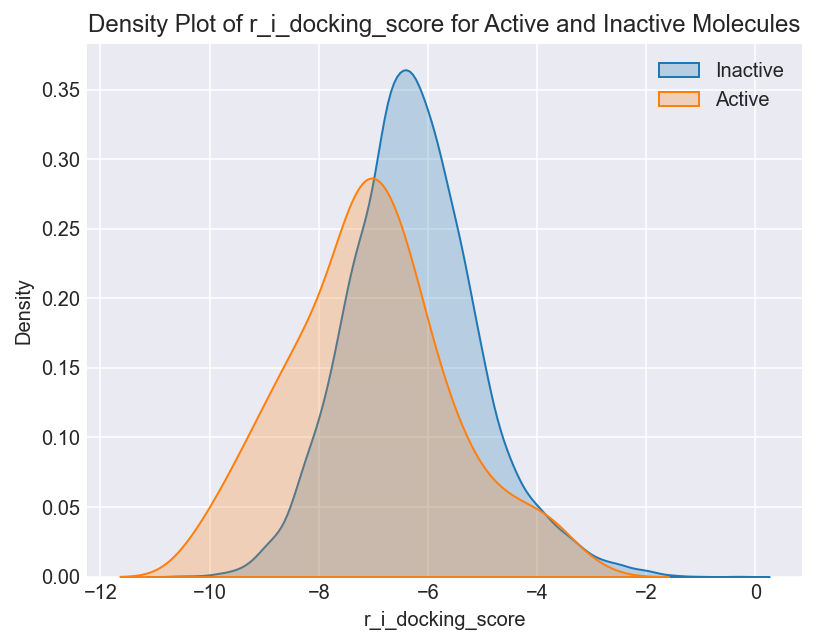

In [139]:
import seaborn as sns

# Create a density plot for the "r_i_docking_score" of active and inactive molecules
sns.kdeplot(all_data.loc[all_data['Activity'] == 0, 'r_i_docking_score'], label='Inactive', fill=True)
sns.kdeplot(all_data.loc[all_data['Activity'] == 1, 'r_i_docking_score'], label='Active', fill=True)

# Add title and labels
plt.title('Density Plot of r_i_docking_score for Active and Inactive Molecules')
plt.xlabel('r_i_docking_score')
plt.ylabel('Density')
plt.legend(loc='upper right')

# Show the plot
plt.show()

In [121]:
def calculate_enrichment_parameters(df):
    """
    Calculates parameters we will need for Enrichment Plots

    Parameters:
    df (pandas.DataFrame): The dataframe to calculate the logAUC for.

    Returns:
    pandas.DataFrame: The dataframe with the logAUC calculated.
    """
    # Sort the subset by 'r_i_docking_score' in ascending order
    df.sort_values(by="r_i_docking_score", inplace=True)

    # Reset the index so that we are ranking by the docking score
    df.reset_index(drop=True, inplace=True)

    # Adjusting the index to start from 1
    df.index += 1

    # Calculate the cumulative sum of active compounds
    df["Cumulative_Actives"] = df["Activity"].cumsum()

    # Calculate the Total Actives
    df["Total_Actives"] = df["Activity"].sum()

    # Calculate the fraction of identified actives at each row
    df["Fraction_Actives"] = df["Cumulative_Actives"] / df["Total_Actives"]

    # Calculate the percentage of compounds screened at each row
    df["Percentage_Screened"] = df.index / len(df)

    return df

In [122]:
calculate_enrichment_parameters(all_data)

,Molecule_Name,Mol,Activity,s_m_source_file,i_m_source_file_index,i_lp_mmshare_version,i_f3d_flags,s_lp_Force_Field,r_lp_Energy,b_lp_Chiralities_Consistent,...,i_i_glide_posenum,r_i_glide_eff_state_penalty,Total_E,Lower_Bound,Upper_Bound,Num_Torsion_Patterns,Cumulative_Actives,Total_Actives,Fraction_Actives,Percentage_Screened
1,C63708483_Isomer1,<rdkit.Chem.rdchem.Mol object at 0x376dd5f50>,0,ADRB1_chembl19_set_decoy_sc.smi,5833,53161,0,S-OPLS,54.0193,1,...,162,0,12.286906,10.119211,NaN,7,0,332,0.000000,0.000083
2,C15446699_Isomer2,<rdkit.Chem.rdchem.Mol object at 0x2f4e13290>,0,ADRB1_chembl19_set_decoy_sc.smi,1244,53161,0,S-OPLS,57.847,1,...,148,0,12.879092,10.862930,inf,5,0,332,0.000000,0.000166
3,C20168010_Isomer1,<rdkit.Chem.rdchem.Mol object at 0x376dd5fc0>,0,ADRB1_chembl19_set_decoy_sc.smi,6370,53161,0,S-OPLS,47.3955,1,...,174,0,13.005273,10.361206,NaN,4,0,332,0.000000,0.000248
4,bucindolol_Isomer1,<rdkit.Chem.rdchem.Mol object at 0x34416c580>,1,ADRB1_chembl19_set_active_sc.smi,2,53161,0,S-OPLS,34.8462,1,...,71,0,8.339743,6.866135,NaN,5,1,332,0.003012,0.000331
5,bucindolol_Isomer1,<rdkit.Chem.rdchem.Mol object at 0x34416c660>,1,ADRB1_chembl19_set_active_sc.smi,288,53161,0,S-OPLS,34.8462,1,...,71,0,8.339743,6.866135,NaN,5,2,332,0.006024,0.000414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12080,C73803375_Isomer1,<rdkit.Chem.rdchem.Mol object at 0x3857038b0>,0,ADRB1_chembl19_set_decoy_sc.smi,11344,53161,0,S-OPLS,29.9424,1,...,189,0,4.917013,4.407562,5.560015,0,332,332,1.000000,0.999669
12081,C49229239_Isomer1,<rdkit.Chem.rdchem.Mol object at 0x385703920>,0,ADRB1_chembl19_set_decoy_sc.smi,5038,53161,0,S-OPLS,25.6059,1,...,252,0,15.170713,12.091766,NaN,0,332,332,1.000000,0.999752
12082,C70538242_Isomer1,<rdkit.Chem.rdchem.Mol object at 0x385703990>,0,ADRB1_chembl19_set_decoy_sc.smi,9113,53161,0,S-OPLS,9.53065,1,...,237,0,4.415769,4.135538,4.727666,5,332,332,1.000000,0.999834
12083,C74546931_Isomer1,<rdkit.Chem.rdchem.Mol object at 0x385703a00>,0,ADRB1_chembl19_set_decoy_sc.smi,9118,53161,0,S-OPLS,26.0528,1,...,207,0,7.514448,6.855520,8.416698,5,332,332,1.000000,0.999917


In [126]:
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

matplotlib.rcdefaults()
plt.style.use("seaborn-darkgrid")
plt.rcParams["figure.dpi"] = 144

/var/folders/2c/b9b_8fbs13j5zcz4wv9bqqjm0000gn/T/ipykernel_9447/3740653291.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-darkgrid")


In [124]:
def plot_enrichment_curve(df):
    """
    Plots the enrichment curve for a dataframe.

    Parameters:
    df (pandas.DataFrame): The dataframe to plot the enrichment curve for.
    enrichment_auc (float): The area under the curve for the enrichment.

    Returns:
    None
    """
    enrichment_auc = auc(df["Percentage_Screened"], df["Fraction_Actives"])

    plt.plot(
        df["Percentage_Screened"] * 100,
        df["Fraction_Actives"],
        label="Enrichment AUC = {:.2f}".format(enrichment_auc),
    )

    # Add axis labels and title
    plt.xlabel("Compounds Screened (%)")
    plt.ylabel("Fraction of Identified Actives")
    plt.title("Enrichment Curve")

    plt.legend()
    plt.show()

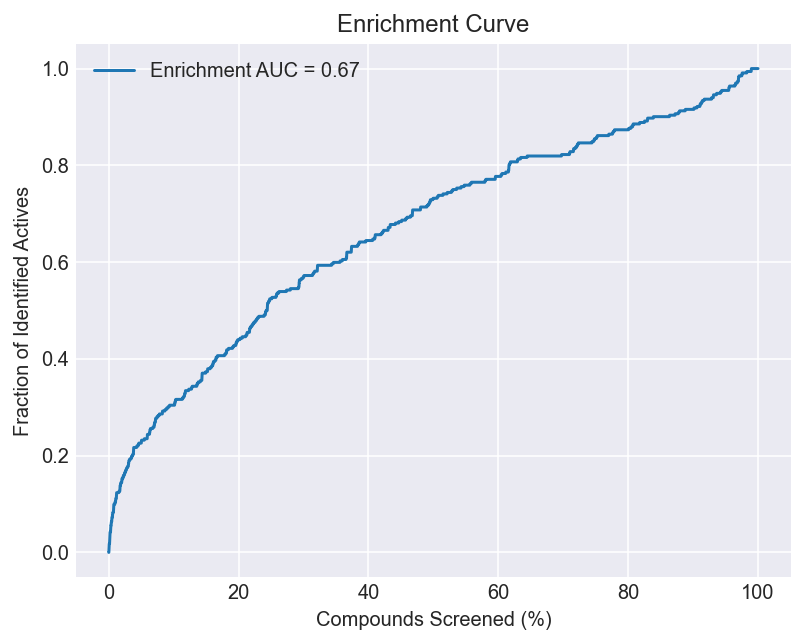

In [125]:
plot_enrichment_curve(all_data)

In [127]:
def plot_roc_curve_inverted(y_true, y_scores):
    """
    Plot the ROC curve for the given true labels and inverted scores.

    :param y_true: The true binary labels.
    :param y_scores: The predicted scores where lower scores indicate positive class.
    """
    # Inverting the scores
    y_scores_inverted = -y_scores

    # Compute the ROC curve and AUC with inverted scores
    fpr, tpr, thresholds = roc_curve(y_true, y_scores_inverted)
    roc_auc = auc(fpr, tpr)

    # Plotting the ROC curve
    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, lw=2, label=f"ROC curve (area = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], lw=2, linestyle="--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operating Characteristic (Inverted Scores)")
    plt.legend(loc="best")
    plt.show()


# Example usage:
# plot_roc_curve_inverted(data['Activity'], data['r_i_docking_score'])

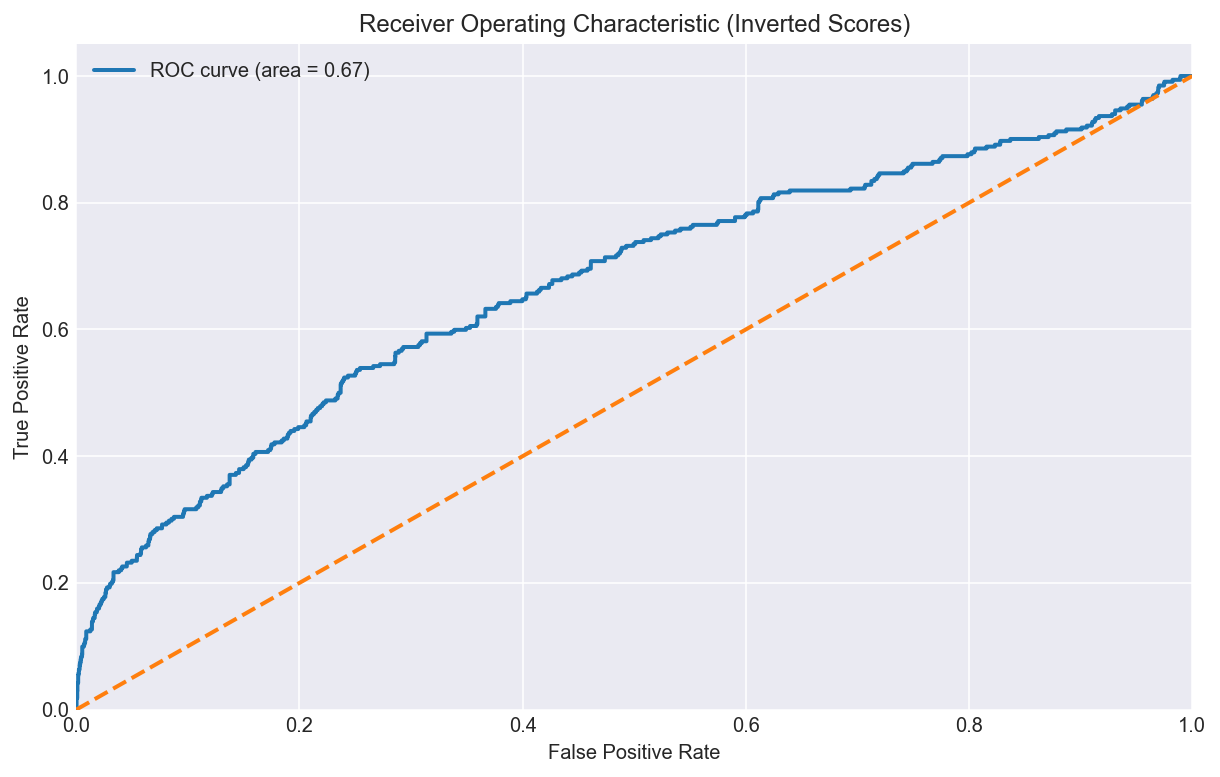

In [128]:
plot_roc_curve_inverted(all_data["Activity"], all_data["r_i_docking_score"])

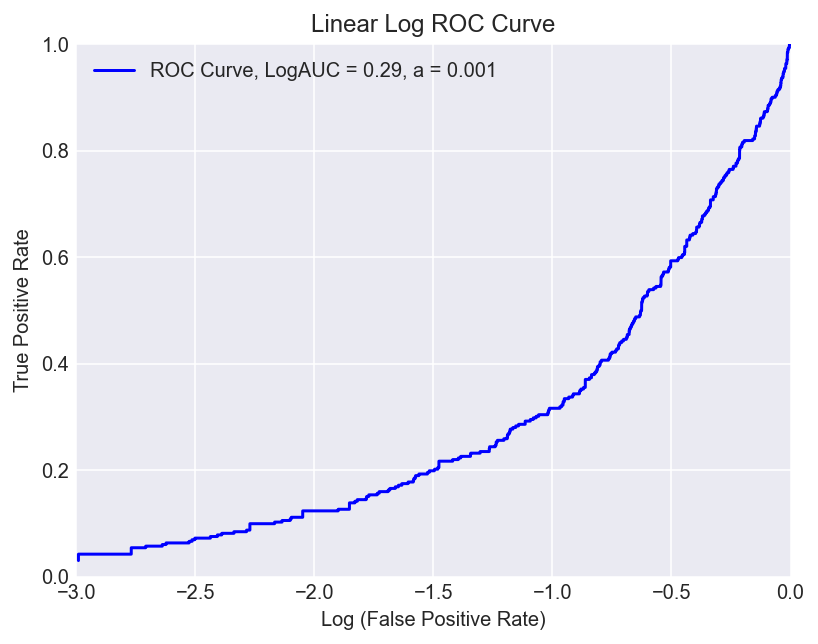

Range of integration in linlog_auc: -2.990930536734575 to 0.0
Value of linglog_auc: 0.8760332155743911
Value of log_auc: 0.29201107185813036


In [132]:
import numpy as np


def plot_linlog_roc_curve(df, a=1e-3):
    # Invert scores since lower scores indicate positive class
    y_scores_inverted = -df["r_i_docking_score"]

    # Calculate FPR, TPR, and thresholds using sklearn
    fpr, tpr, _ = roc_curve(df["Activity"], y_scores_inverted)

    # Select the thresholds that result in FPR >= a for log scale plotting
    valid_indices = np.where(fpr >= a)
    fpr_valid = fpr[valid_indices]
    tpr_valid = tpr[valid_indices]

    # Calculate log of FPR for valid indices
    log_fpr_valid = np.log10(fpr_valid)

    # Calculate the AUC for the valid range
    linlog_auc = auc(log_fpr_valid, tpr_valid)
    log_auc = linlog_auc / -np.log10(a)

    # Plot the ROC curve
    plt.plot(
        log_fpr_valid,
        tpr_valid,
        color="blue",
        label=f"ROC Curve, LogAUC = {log_auc:.2f}, a = {a}",
    )

    plt.xlim([np.log10(a), 0])
    plt.ylim([0, 1])
    plt.xlabel("Log (False Positive Rate)")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="upper left")
    plt.title("Linear Log ROC Curve")
    plt.show()

    print(
        f"Range of integration in linlog_auc: {log_fpr_valid[0]} to {log_fpr_valid[-1]}"
    )
    print(f"Value of linglog_auc: {linlog_auc}")
    print(f"Value of log_auc: {log_auc}")


# Running the function with the provided dataset
plot_linlog_roc_curve(all_data,a=1e-3)

In [133]:
# List of 'Total_E' thresholds
total_e_thresholds = [None, 4, 4.5, 5.0, 5.5, 6.0, 7.0, 7.5, 8.0]



In [134]:
def plot_semi_log_roc(df, a=1e-3, total_e_threshold=None, ax=None):
    # Filter dataframe based on 'Total_E' threshold if provided
    if total_e_threshold is not None:
        df = df[df["Total_E"] <= total_e_threshold]

    # Invert scores since lower scores indicate positive class
    y_scores_inverted = -df["r_i_docking_score"]

    # Calculate FPR, TPR, and thresholds using sklearn
    fpr, tpr, _ = roc_curve(df["Activity"], y_scores_inverted)

    # Select the thresholds that result in FPR >= a for log scale plotting
    valid_indices = np.where(fpr >= a)
    fpr_valid = fpr[valid_indices]
    tpr_valid = tpr[valid_indices]

    # Calculate log of FPR for valid indices
    log_fpr_valid = np.log10(fpr_valid)

    # Calculate LogAUC
    log_auc = (auc(log_fpr_valid, tpr_valid) / -np.log10(a)) * 100

    # Count the number of rows with Activity = 1 and the total number of rows
    activity_1_count = df[df["Activity"] == 1].shape[0]
    total_count = df.shape[0]

    # Plot semi-log ROC curve
    ax.plot(
        log_fpr_valid,
        tpr_valid,
        label=f"LogAUC: {log_auc:.2f}\nActivity=1 count: {activity_1_count}\nTotal count: {total_count}",
    )
    ax.legend()




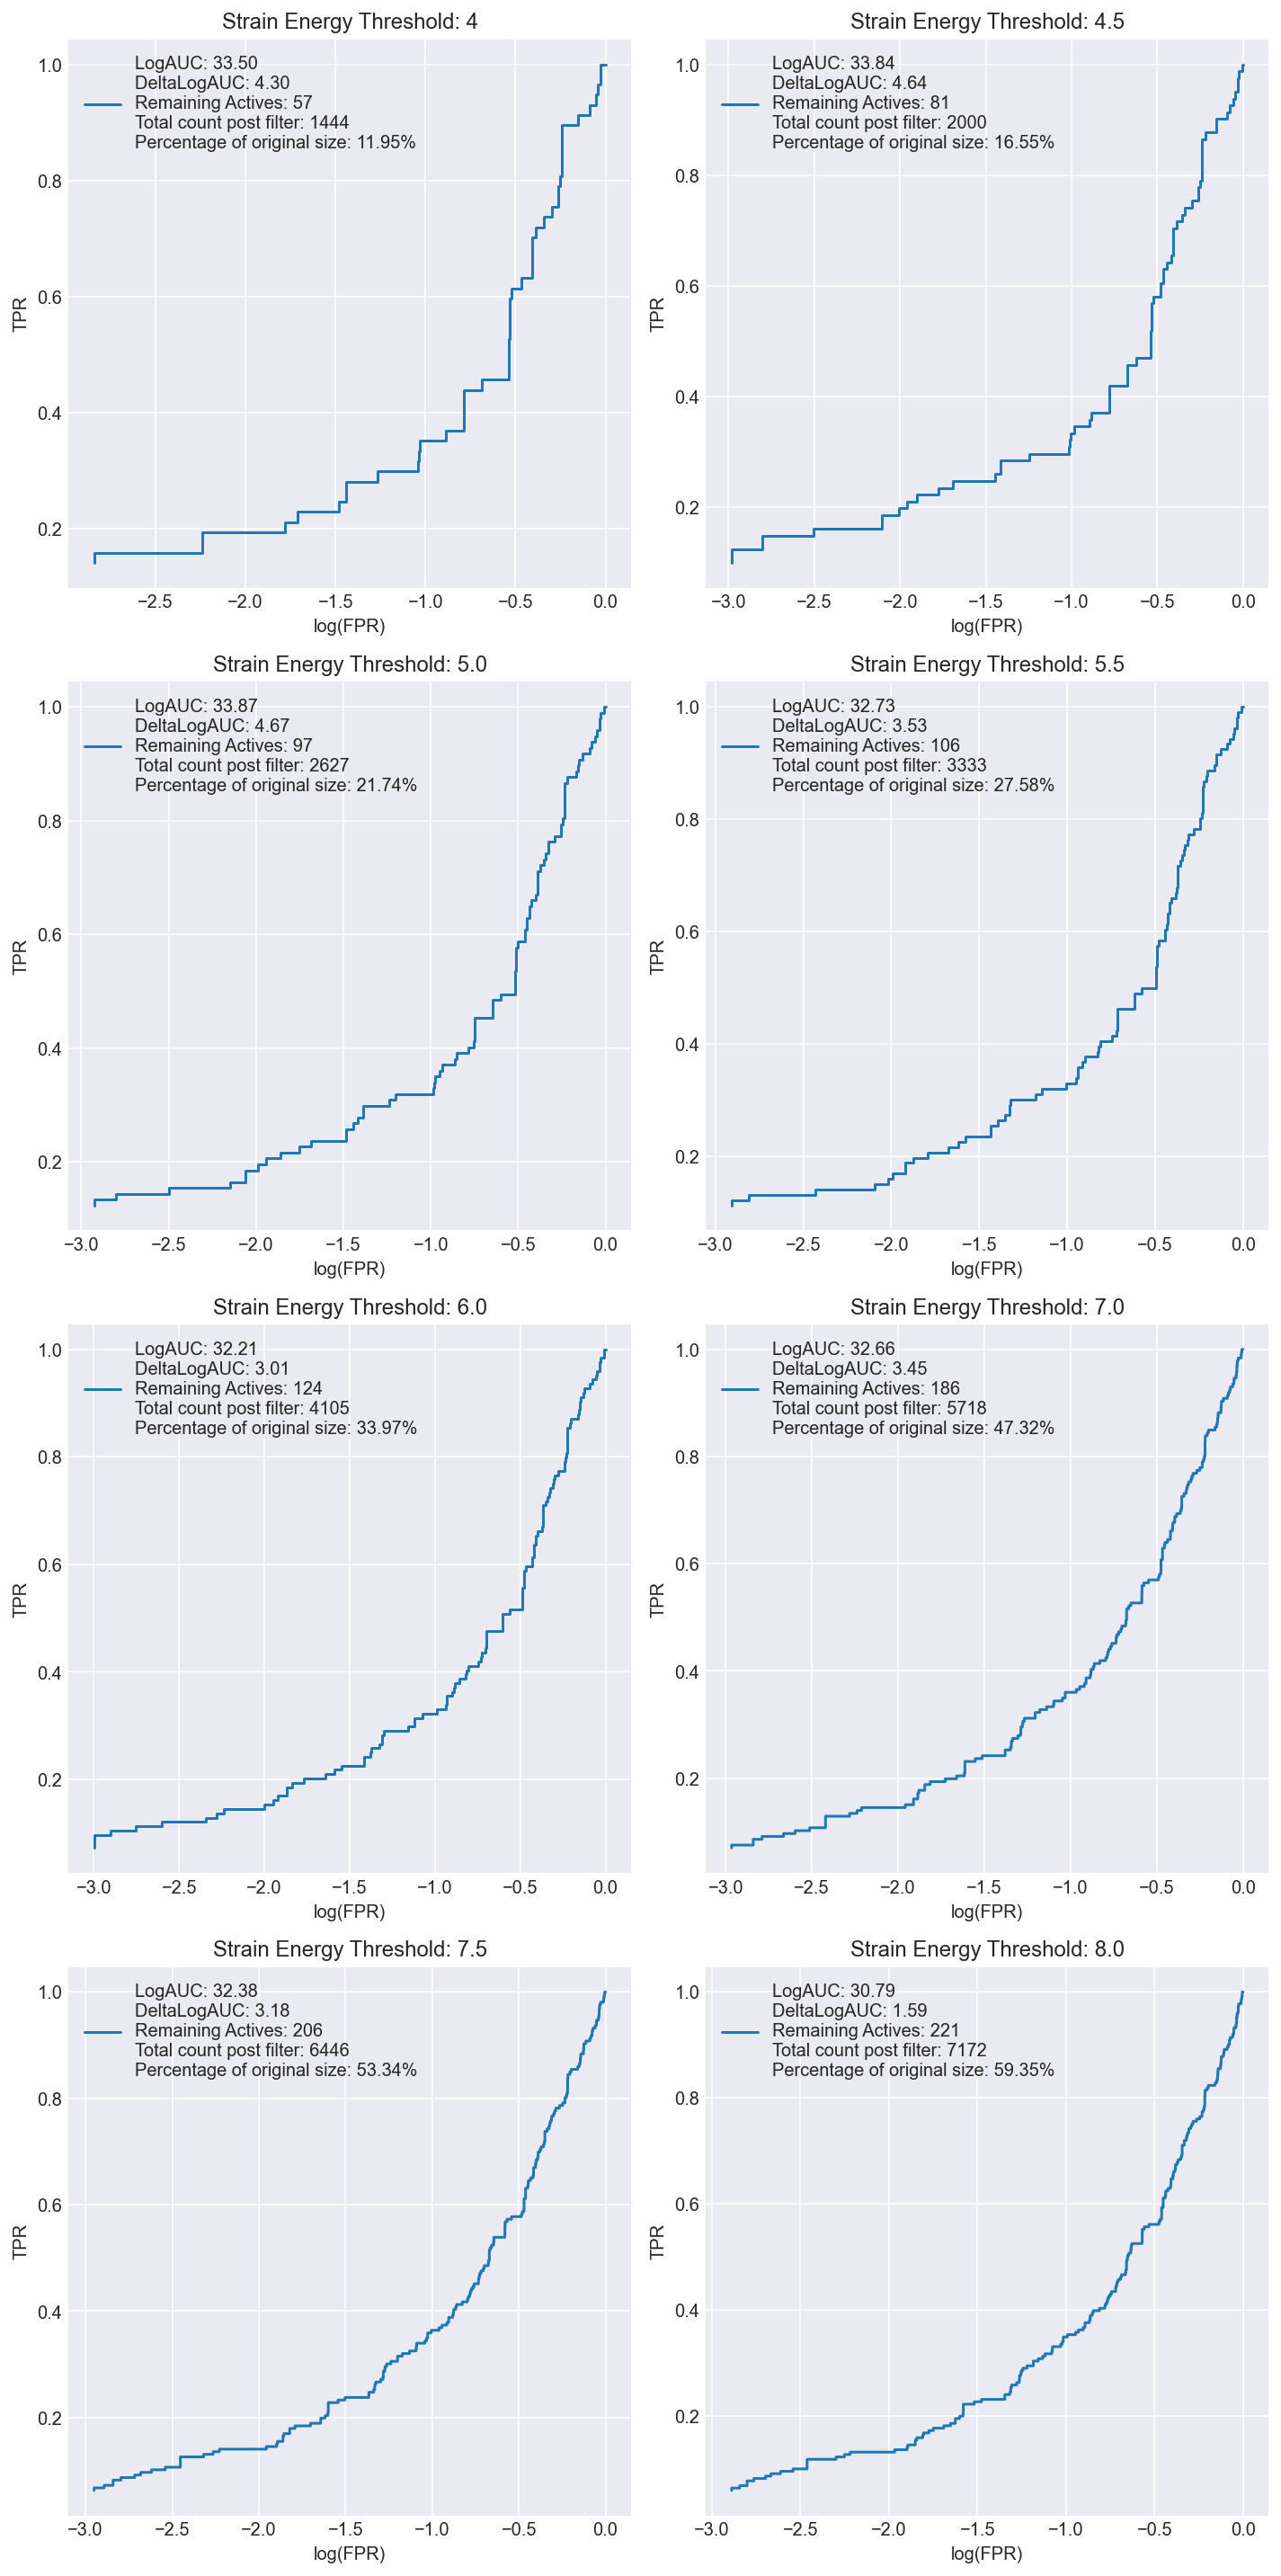

In [136]:
# Create a 2x4 grid of subplots
fig, axs = plt.subplots(4, 2, figsize=(10, 20))

# Calculate log_auc for no filtering
fpr_none, tpr_none, _ = roc_curve(all_data["Activity"], -all_data["r_i_docking_score"])
valid_indices_none = np.where(fpr_none >= 1e-3)
auc_none = auc(np.log10(fpr_none[valid_indices_none]), tpr_none[valid_indices_none])
log_auc_none = (auc_none / -np.log10(1e-3)) * 100

# Plot semi-log ROC curve for each threshold
for i, t in enumerate(total_e_thresholds[1:]):
    ax = axs[i // 2, i % 2]

    # Filter dataframe based on 'Total_E' threshold
    df_filtered = all_data[all_data["Total_E"] <= t]

    # Call the function with the filtered data
    plot_semi_log_roc(df_filtered, total_e_threshold=t, ax=ax)

    # Calculate FPR, TPR, and thresholds for filtered data
    fpr, tpr, _ = roc_curve(df_filtered["Activity"], -df_filtered["r_i_docking_score"])
    valid_indices = np.where(fpr >= 1e-3)
    auc_base = auc(np.log10(fpr[valid_indices]), tpr[valid_indices])
    log_auc = (auc_base / -np.log10(1e-3)) * 100

    # Calculate deltaLogAUC
    delta_log_auc = log_auc - log_auc_none

    # Add deltaLogAUC to the legend
    ax.legend(
        [
            f'LogAUC: {log_auc:.2f}\nDeltaLogAUC: {delta_log_auc:.2f}\nRemaining Actives: {df_filtered[df_filtered["Activity"] == 1].shape[0]}\nTotal count post filter: {df_filtered.shape[0]}\nPercentage of original size: {df_filtered.shape[0]/all_data.shape[0]*100:.2f}%'
        ]
    )

    ax.set_title(f"Strain Energy Threshold: {t}")
    ax.set_xlabel("log(FPR)")
    ax.set_ylabel("TPR")

plt.tight_layout()
plt.show()

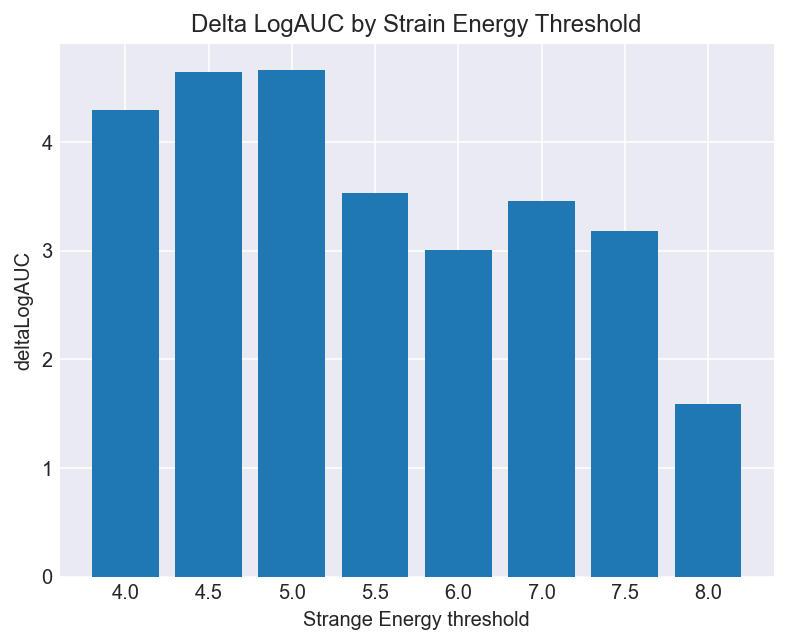

In [138]:
def logauc_by_strain(df, a=1e-3, total_e_threshold=None):
    # Filter dataframe based on 'Total_E' threshold if provided
    if total_e_threshold is not None:
        df = df[df["Total_E"] <= total_e_threshold]

    # Invert scores since lower scores indicate positive class
    y_scores_inverted = -df["r_i_docking_score"]

    # Calculate FPR, TPR, and thresholds using sklearn
    fpr, tpr, _ = roc_curve(df["Activity"], y_scores_inverted)

    # Select the thresholds that result in FPR >= a for log scale plotting
    valid_indices = np.where(fpr >= a)
    fpr_valid = fpr[valid_indices]
    tpr_valid = tpr[valid_indices]

    # Calculate log of FPR for valid indices
    log_fpr_valid = np.log10(fpr_valid)

    # Calculate the AUC for the valid range
    linlog_auc = auc(log_fpr_valid, tpr_valid)
    log_auc = (linlog_auc / -np.log10(a)) * 100

    return log_auc


def delta_logauc_by_strain(df, a=1e-3, total_e_threshold=None):
    # Calculate log_auc for no filtering
    log_auc_none = logauc_by_strain(df, a, total_e_threshold=None)

    # Calculate log_auc for the given threshold
    log_auc_threshold = logauc_by_strain(df, a, total_e_threshold)

    # Calculate deltaLogAUC
    delta_log_auc = log_auc_threshold - log_auc_none

    return delta_log_auc


# Calculate deltaLogAUC for each threshold and plot
delta_log_aucs = [
    delta_logauc_by_strain(all_data, total_e_threshold=t) for t in total_e_thresholds[1:]
]
plt.bar(
    range(len(total_e_thresholds[1:])),
    delta_log_aucs,
    tick_label=total_e_thresholds[1:],
)
plt.xlabel("Strange Energy threshold")
plt.ylabel("deltaLogAUC")
plt.title("Delta LogAUC by Strain Energy Threshold")
plt.show()